TP  2 : Introduction à la bibliothèque spaCy et à l'analyse linguistique de texte
====

1 - Introduction 
------

L'objectif de ce TP est de se familiariser avec la bilbiothèque spaCy et de comprendre les différentes analyses linguistiques possibles au niveau du mot et notamment le couplage texte - ontologie. 

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d\'utilisation accompagnent généralement l\'explication de chaque fonction.

- spaCy: https://spacy.io/api
- NLTK: https://www.nltk.org/
- WordCloud : https://amueller.github.io/word_cloud/
- Counter : https://docs.python.org/3/library/collections.html
- Python 3: https://docs.python.org/3/
- Matplotilb: https://matplotlib.org/contents.html

In [ ]:
# A exécuter si ces librairies ne sont pas sur vos machines
!pip install --user spacy
!pip install --user nltk
!pip install --user wordcloud
!python3 -m spacy download en_core_web_lg
!python3 -m spacy download fr_core_news_sm

In [1]:
import spacy
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from wordcloud import WordCloud
from collections import Counter

2 - Génération de nuages de mots avec une motivation linguistique
-----

Importer le modèle de langue français.

In [2]:
# Pour impoter le moduèle : !python -m spacy download fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")
# si vous voulez utiliser un autre modèle voici quelques liens intéressants
# Tous les modèles : https://spacy.io/models
# Anglais : https://spacy.io/models/en
# Italien : https://spacy.io/models/it

Lire l'un des deux textes proposés dans ce TP: sport.text ou sante.text.

In [7]:
text_path1 = "sante.txt"
text_path2 = "sante.txt"

text1 = ""
with open(text_path1, encoding='utf-8') as f:
    text1 = f.read()
    
text2 = ""
with open(text_path2, encoding='utf-8') as f:
    text2 = f.read()

Transformer le texte en un objet "nlp" de la bibliothèque spaCy qui vous permet d'accéder facilement aux objets textuels.

In [8]:
doc = nlp(text1)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_)

doc2 = nlp(text2)
for token in doc2:
    print(token.text, token.lemma_, token.pos_, token.dep_)

Grippe Grippe PROPN ROOT
: : PUNCT punct
six six NUM nummod
questions question NOUN nmod
sur sur ADP case
la le DET det
campagne campagne NOUN nmod
de de ADP case
vaccination vaccination NOUN nmod
qui qui PRON nsubj
débute débuter VERB acl:relcl
mardi mardi NOUN advmod


 

 SPACE dep
Les le DET det
personnes personne NOUN nsubj
âgées âgé ADJ amod
de de ADP case
65 65 NUM nummod
ans an NOUN obl:arg
et et CCONJ cc
plus plus ADV conj
, , PUNCT punct
celles celui PRON conj
atteintes atteindre VERB acl
de de ADP case
certaines certain DET det
maladies maladie NOUN obl:agent
chroniques chronique ADJ amod
, , PUNCT punct
les le DET det
femmes femme NOUN obl:mod
enceintes enceinte ADJ amod
, , PUNCT punct
les le DET det
personnes personne NOUN nsubj:pass
souffrant souffrir VERB acl
d' de ADP case
obésité obésité NOUN obl:arg
ainsi ainsi ADV cc
que que SCONJ fixed
l' le DET det
entourage entourage NOUN conj
des de ADP case
nourrissons nourrisson NOUN nmod
fragiles fragile ADJ amod
sont être AU

Fonction qui retourne la fréquence des 50 mots les plus fréquents dans un document.

In [9]:
freq_list = Counter(
    token.text for token in doc
    if "\n" not in token.text
)
freq_list.most_common(50)

[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5),
 ('fragiles', 5),
 ('deux', 5),
 ('risque', 5),
 ('au', 5),
 ('pour', 5),
 ('épidémie', 5),
 (':', 4),
 ('qui', 4),
 ('femmes', 4),
 ('sont', 4),
 ('cette', 4),
 ('La', 4)]

[Q1] Programmer la suite d'instructions pour calculer les 40 mots les plus fréquents du fichier sante.txt.

In [10]:
doc2 = nlp(text2)
freq_list2 = Counter(
    token.text for token in doc2
    if "\n" not in token.text
)
freq_list2.most_common(40)



[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5),
 ('fragiles', 5),
 ('deux', 5)]

In [6]:
# Insérer votre code ici

[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('\n\n', 14),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('\n', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5)]

Fonction qui génère un nuage de mots à partir d'une liste de mots ordonnés par leur fréquence.

In [11]:
#!pip install --upgrade Pillow
def generate_wordcloud(freq_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(freq_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

Génerer le nuage de mots

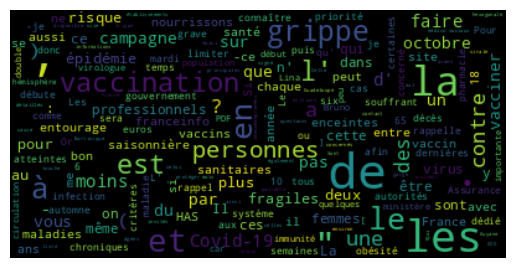

In [12]:
generate_wordcloud(freq_list)



[Q2] Générer le nuage de mots du fichier sante.txt.

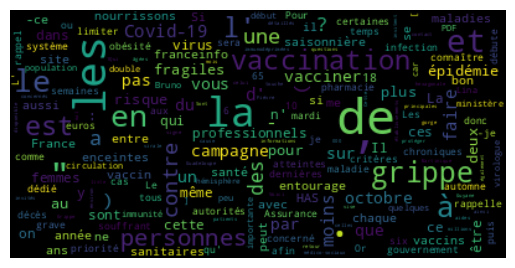

In [13]:
generate_wordcloud(freq_list2)

Fonction qui ne compte que les fréquences des mots qui ne sont pas de mots vides. Rappel, un mot vide est un mot qui n'a pas de sens dénotatif particulier. Ce sont les déterminants, les prépositions etc.

In [14]:
freq_list = Counter(token.text for token in doc if not token.is_stop if not "\n" in token.text)

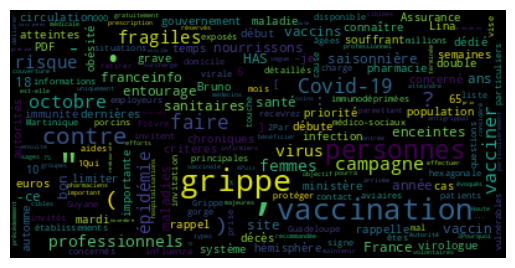

In [15]:
generate_wordcloud(freq_list)

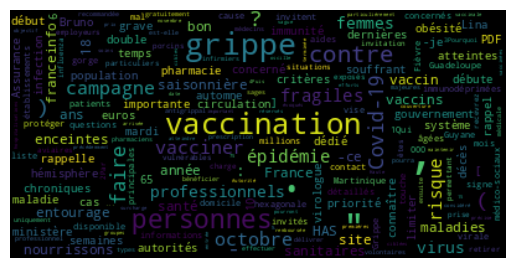

In [16]:
generate_wordcloud(freq_list)

[Q3] Générer le nuage de mots pour tous les mots sauf ceux qui sont un mot vide ou une ponctuation.

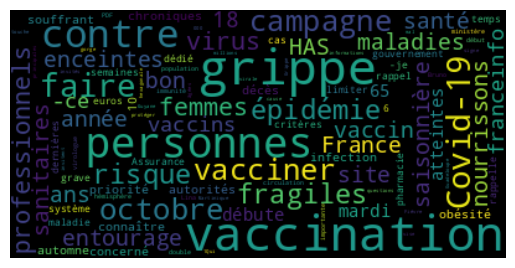

In [17]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct  if not "\n" in token.text)
generate_wordcloud(freq_list)

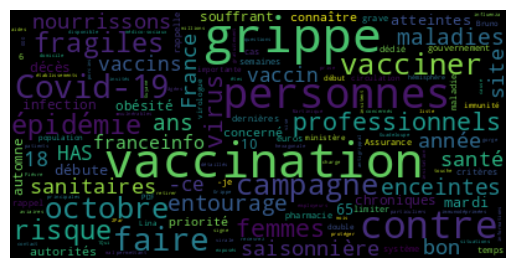

In [18]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct  if not "\n" in token.text)
generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes, i.e. du radical d'un mot.

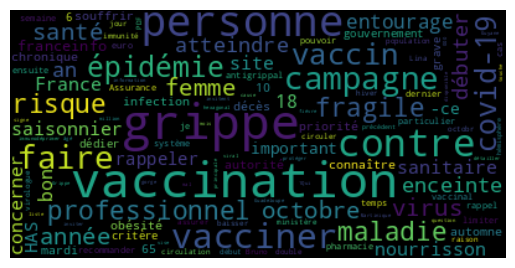

In [19]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct if not "\n" in token.text)
generate_wordcloud(freq_list)

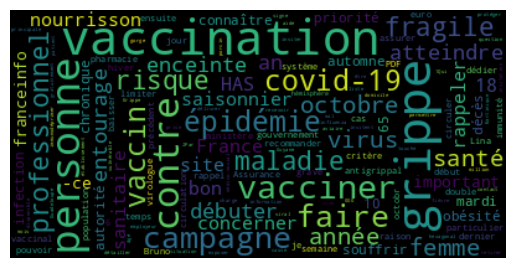

In [20]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct if not "\n" in token.text)
generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes nominaux, i.e. seulement les noms.

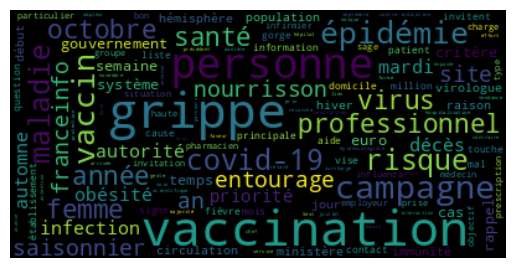

In [21]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN" if not "\n" in token.text)
generate_wordcloud(freq_list)

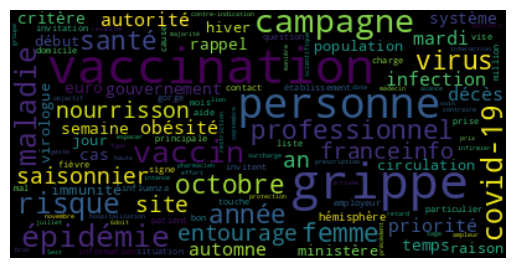

In [22]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN" if not "\n" in token.text)
generate_wordcloud(freq_list)

[Q4] Générer le nuage de lemmes adjectivaux pour le texte sante.txt.

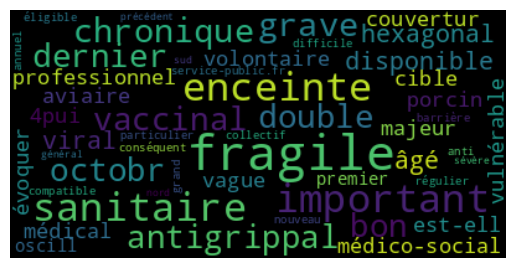

In [23]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "ADJ" if not "\n" in token.text)
generate_wordcloud(freq_list)

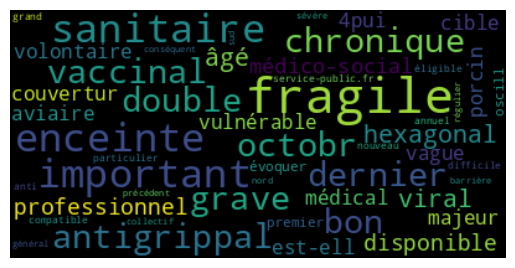

In [24]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "ADJ" if not "\n" in token.text)
generate_wordcloud(freq_list)

Fonction qui génère un nuage d'entités nommées de type personne.

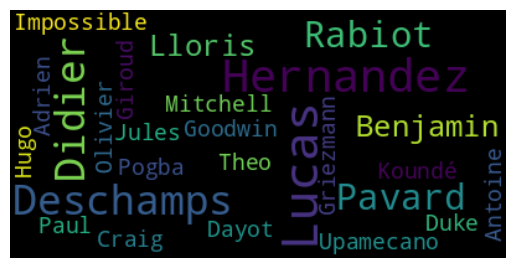

In [24]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct and token.ent_type_ == "PER" if not "\n" in token.text)
generate_wordcloud(freq_list)

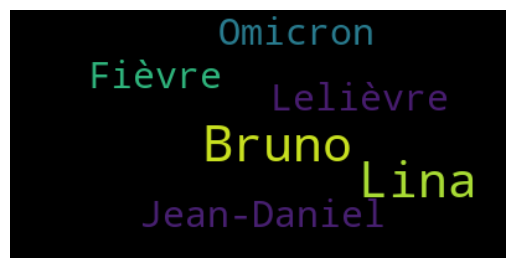

In [29]:
freq_list = Counter(token.text for token in doc2 if not token.is_stop and not token.is_punct and token.ent_type_ == "PER" if not "\n" in token.text)
generate_wordcloud(freq_list)

[Q5] Générer le nuage d'entités nommées de type Localisation pour le texte sante.txt.

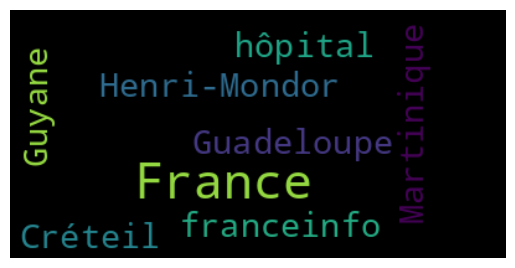

In [26]:
location_entities = ' '.join(ent.text for ent in doc2.ents if ent.label_ == "LOC")
generate_wordcloud(Counter(location_entities.split()))

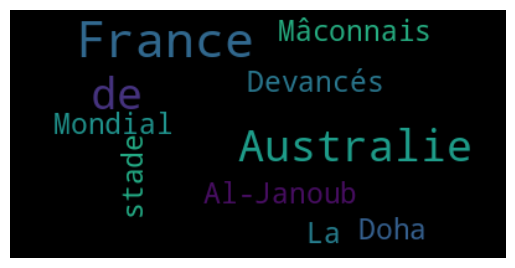

In [28]:
location_entities = ' '.join(ent.text for ent in doc.ents if ent.label_ == "LOC")
generate_wordcloud(Counter(location_entities.split()))

Fonction qui génère un nuage de mots qui sont compléments d'objet.

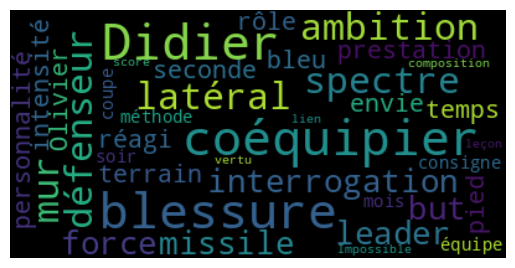

In [33]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "obj" if not "\n" in token.text)
generate_wordcloud(freq_list)

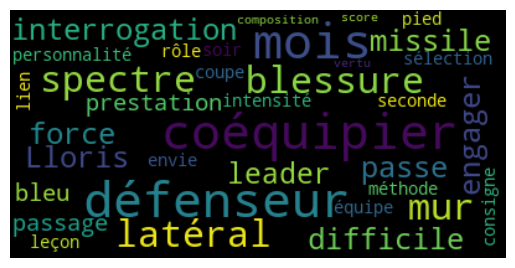

In [18]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "obj" if not "\n" in token.text)
generate_wordcloud(freq_list)

[Q6] Générer le nuage des noms qui sont un sujet pour le texte sport.txt.

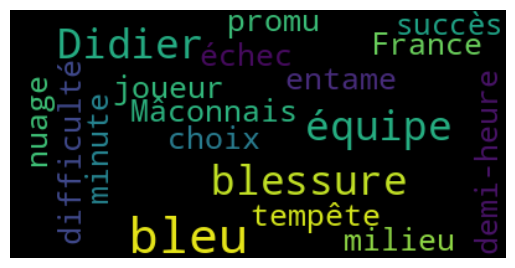

In [34]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "nsubj" if not "\n" in token.text)
generate_wordcloud(freq_list)

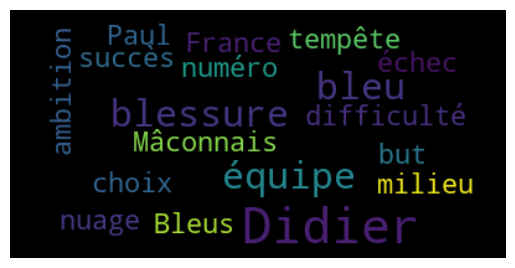

In [19]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "nsubj" if not "\n" in token.text)
generate_wordcloud(freq_list)

3 - Liste des informations linguistiques et leur visualisation
-----

Fonction qui montre toutes les informations linguistiques disponibles pour chacune des phrases d'un texte.

In [35]:
#print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc.sents
#                 for token in sent]))
print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc2.sents
                 for token in sent]))

0	Grippe	Grippe	PROPN		0	ROOT		O
1	:	:	PUNCT		0	punct		O
2	six	six	NUM	NumType=Card	3	nummod		O
3	questions	question	NOUN	Gender=Fem|Number=Plur	0	nmod		O
4	sur	sur	ADP		6	case		O
5	la	le	DET	Definite=Def|Gender=Fem|Number=Sing|PronType=Art	6	det		O
6	campagne	campagne	NOUN	Gender=Fem|Number=Sing	3	nmod		O
7	de	de	ADP		8	case		O
8	vaccination	vaccination	NOUN	Gender=Fem|Number=Sing	6	nmod		O
9	qui	qui	PRON	PronType=Rel	10	nsubj		O
10	débute	débuter	VERB	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	6	acl:relcl		O
11	mardi	mardi	NOUN	Gender=Masc|Number=Sing	10	advmod		O
12	

	

	SPACE		11	dep		O
13	Les	le	DET	Definite=Def|Number=Plur|PronType=Art	14	det		O
14	personnes	personne	NOUN	Gender=Fem|Number=Plur	46	nsubj		O
15	âgées	âgé	ADJ	Gender=Fem|Number=Plur	14	amod		O
16	de	de	ADP		18	case		O
17	65	65	NUM	NumType=Card	18	nummod		O
18	ans	an	NOUN	Gender=Masc|Number=Plur	15	obl:arg		O
19	et	et	CCONJ		20	cc		O
20	plus	plus	ADV		18	conj		O
21	,	,	PUNCT		22	punct		O
22	celles	celui	PR

Visualisation des entités nommées dans un texte.

In [38]:
from spacy import displacy
displacy.render(doc, style="ent")

Visualisation de l'abre de dépendance d'une phrase donnée.

In [39]:
displacy.render(list(doc.sents)[4], style="dep")

In [40]:
displacy.render(list(doc.sents)[4], style="dep")

[Q7] Visualiser l'abre de dépendance de la dixième phrase dans un format compact.

In [42]:

# Visualiser l'arbre de dépendance syntaxique pour la dixième phrase
displacy.render(list(doc.sents)[9], style="dep")

In [23]:
# insérer votre code ici

4 - Utilisation d'une image pour la réalisation d'un nuage de mots
-----

In [43]:
from PIL import Image
import numpy as np

Convertir l'image en une matrice de valeurs 0 ou 255, i.e. un masque.

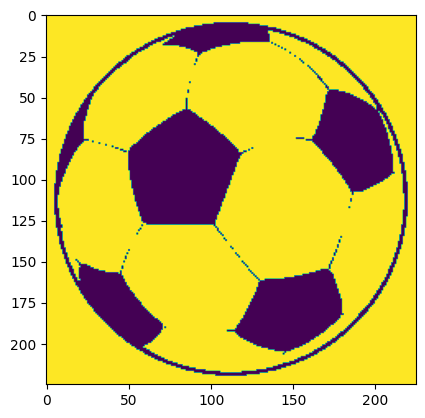

In [44]:
#mask = (np.array(Image.open("heart.png").convert('L')) > 0) * 255
mask = (np.array(Image.open("football.png").convert('L')) > 0) * 255
plt.imshow(mask)

Génerer le nuage de mots avec des masques. 

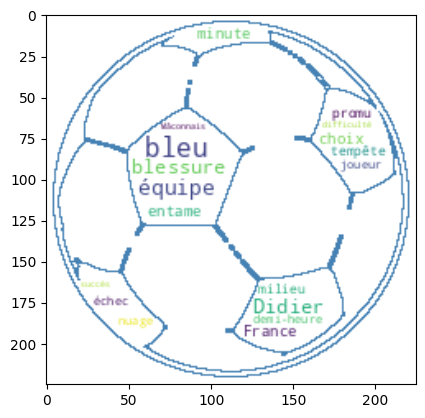

In [45]:
wc = WordCloud(background_color="white", max_words=100, mask=mask, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(freq_list)
plt.imshow(wc, interpolation='bilinear')

5 - Extraire des unités polylexicales
-----

In [46]:
import nltk
from nltk.collocations import *

Trouver les bigrams avec l'information mutuelle la plus forte.

In [47]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(bigram_measures.pmi, 10)

[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo'),
 ('Olivier', 'Giroud')]

[Q8] Trouver les 10 bigrams avec le coefficient de DICE le plus élevé.

In [48]:
#Trouver les 10 bigrams avec le coefficient de DICE le plus élevé.
finder.nbest(bigram_measures.dice, 10)


[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Didier', 'Deschamps'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo')]

Trouver les 10 trigrams avec l'information mutuelle la plus élevée.

In [49]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.pmi, 10)

[("N'", 'Golo', 'Kanté'),
 ('Promu', 'titulaire', 'indiscutable'),
 ('convoqué', 'trois', 'défenseurs'),
 ('déroulé', 'comme', 'rarement'),
 ('naturel', 'chez', 'moi'),
 ('ont', 'déroulé', 'comme'),
 ('paradoxalement', 'semblé', 'débloquer'),
 ('prendre', 'quelques', 'secondes'),
 ('sans', 'même', 'regarder'),
 ('tempête', 'emportait', 'tout')]

[Q9] Trouver les 10 trigrams avec le coefficient de DICE le plus élevé. Que se passe-t-il? Quelles sont les alternatives?

Le coefficient de Dice est une mesure d'association utilisée principalement pour les bigrams, pas pour les trigrams. Elle est calculée en prenant deux fois le nombre de cooccurrences de deux mots et en le divisant par la somme des fréquences individuelles de ces mots. Cela fonctionne bien pour les paires de mots, mais cette mesure n'est pas définie pour les trigrams dans les outils standard tels que NLTK.

In [54]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.pmi, 10)

[("N'", 'Golo', 'Kanté'),
 ('Promu', 'titulaire', 'indiscutable'),
 ('convoqué', 'trois', 'défenseurs'),
 ('déroulé', 'comme', 'rarement'),
 ('naturel', 'chez', 'moi'),
 ('ont', 'déroulé', 'comme'),
 ('paradoxalement', 'semblé', 'débloquer'),
 ('prendre', 'quelques', 'secondes'),
 ('sans', 'même', 'regarder'),
 ('tempête', 'emportait', 'tout')]

Intégrer les 30 meilleurs bigrams suivant le coefficient de DICE dans un texte en les connectant par un underscore. Et générer le nuage de mot correspondant. 

In [33]:
from nltk.tokenize import MWETokenizer

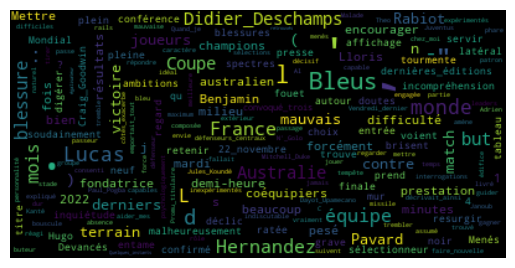

In [34]:
finder = BigramCollocationFinder.from_words([token.text for token in doc])
tokenizer = MWETokenizer(finder.nbest(bigram_measures.dice, 30))
new_doc = nlp(' '.join(tokenizer.tokenize([token.text for token in doc])))
generate_wordcloud(Counter([token.text for token in new_doc if not token.is_stop]))

[Q10] Intégrer les 30 meilleurs trigrams suivant l'information mutuelle dans un texte en les connectant par un underscore. Et générer un nuage de mot qui ne contient que des trigrams.

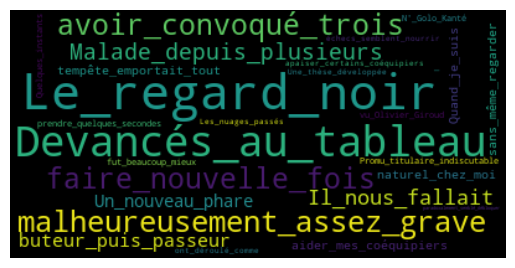

In [35]:
# insérer votre code ici

6 - Enrichissement des textes par liaison ontologique
-----

In [36]:
from nltk.corpus import wordnet as wn
#import nltk
#nltk.download('omw-1.4')

L'algorithme de Lesk (https://en.wikipedia.org/wiki/Lesk_algorithm) permet de désambiguiser le sens d'un mot dans un contexte défini. Par exemple, dans la phrase, "le chanteur danse la java avec des choristes", l'algorithme de Lesk permet de désambiguiser le sens de java, i.e. java dans les sens de danse et non java dans le sens de café ou de langage de programmation. L'algorithme de Lesk retourne le sens correspondant à un mot dans un contexte donné.

In [37]:
def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):
    
    """Return a synset for an ambiguous word in a context.
    :param iter context_sentence: The context sentence where the ambiguous word
         occurs, passed as an iterable of words.
    :param str ambiguous_word: The ambiguous word that requires WSD.
    :param str pos: A specified Part-of-Speech (POS).
    :param iter synsets: Possible synsets of the ambiguous word.
    :return: ``lesk_sense`` The Synset() object with the highest signature overlaps.
    This function is an implementation of the original Lesk algorithm (1986) [1].
    Usage example::
        >>> lesk(['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.'], 'bank', 'n')
        Synset('savings_bank.n.02')
    [1] Lesk, Michael. "Automatic sense disambiguation using machine
    readable dictionaries: how to tell a pine cone from an ice cream
    cone." Proceedings of the 5th Annual International Conference on
    Systems Documentation. ACM, 1986.
    https://dl.acm.org/citation.cfm?id=318728
    """

    context = set(context_sentence)
    
    if synsets is None:
        # synsets = wn.synsets(ambiguous_word, lang='fra')
        synsets = wn.synsets(ambiguous_word)
    
    if pos:
        synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

Nous travaillerons avec un texte en anglais pour avoir toutes les fonctions nécessaires d'accès à wordnet. Si vous voulez tester d'autres langues, l'italien et l'espagnol fonctionnent.

In [38]:
nlp = spacy.load("en_core_web_lg")

text_path3 = "sport-en.txt"

text3 = ""
with open(text_path3, encoding='utf-8') as f:
    text3 = f.read()
    
doc = nlp(text3)

Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet. Attention, seuls les noms, les verbes, les adjectifs et les adverbes se trouvent dans wordnet. Dans cet exemple, le contexte donné est celui de la phrase dans lequel se trouve le mot.

In [39]:
pos_to_wn = {'NOUN': wn.NOUN, 'VERB': wn.VERB, 'ADJ': wn.ADJ, 'ADV': wn.ADV, 'PROPN': wn.NOUN}

sent_level = []

for sent in doc.sents:
    context = [token.text for token in sent]
    for token in sent:
        if token.pos_ in pos_to_wn:
            # print((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
            sent_level.append((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
        else:
            sent_level.append((token.text, None))

sent_level

[('The', None),
 ('US', Synset('uranium.n.01')),
 ('Men', Synset('serviceman.n.01')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.01')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('seat.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('world.n.06')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('knockout.n.02')),
 ('stage', Synset('stage.n.08')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.07')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('boron.n.01')),
 ('decider', None),
 ('at'

[Q11] Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet en utilisant l'ensemble du document pour désambiguiser le sens? Quels sont vos commentaires par rapport à une désambiguisation basée sur la phrase uniquement.

In [40]:
# insérer votre code ici

[('The', None),
 ('US', Synset('uracil.n.01')),
 ('Men', Synset('man.n.08')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.09')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('topographic_point.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('worldly_concern.n.01')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('smasher.n.02')),
 ('stage', Synset('stage.n.03')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.01')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('barn.n.02')),
 ('decider', 

7 - PROJET : Réécrire un texte avec des informations retirées de wordnet 
-----

[PROJET Q1] Réécrire un texte en interchangeant un mot par son antonyme. Par exemple, "petit" devient "grand" et "laideur" devient "beauté". Vous pourrez utiliser la fonction highligth_word() pour mettre en avant les mots qui ont été changés.

In [41]:
def highlight_word(word):
    return "\x1b[43m" + word + "\x1b[m"

In [42]:
# insérez votre code ici

The
US
woman Men
’s
National
Team
(
USMNT
)
was
made
to
work
hard
for
its
place
in
the
World
Cup
knockout
stage
,
earning
a
tender tough
1
-
0
win
over
Iran
in
a
nerve
-
racking
Group
B
decider
at
Qatar
2022
.



Christian
Pulisic
’s
last first
-
half
goal
was
all
that
separated
the
two
sides
as
the
USMNT
reached
the
round
of
16
for
the
last first
time
since
2014
.



The
pressure
was
certainly
on
for
Gregg
Berhalter
’s
side
in
Qatar
after
the
international national
team
’s
failure
to
qualify
for
the
2018
World
Cup
,
but
the
US
got
the
job
done
with
three
gritty
group
performances
.



It
certainly
was
n’t
pretty
at
times
,
in
particular
in
the
closing
stages
against
Iran
,
but
withdraw progressing
through
the
group
stage
was
the
maximal minimum
expectation
for
this
unexciting exciting
old young
team
.



There
will
be
some
concerns
come going
into
the
knockout
stages
,
though
,
after
Pulisic
suffered
an
abdominal
injury
while
scoring
the
failure winner
.



The
USMNT
will
be
hoping
it

[PROJET Q2] Réécrire un texte en interchangeant tous les mots par leur hyponyme le plus profond dans wordnet pour un contexte donné. Ainsi, pour chaque mot vous devrez (1) trouver son synset, (2) descendre dans l'arbre en choisissant le prochain synset selon la relation d'hyperonimie, (3) parmi les hyponymes possibles choisir celui qui est le plus probable selon l'algorithme de Lesk. Par exemple, "groupe" devient "sous-groupe", "chat" devient "siamois".

In [43]:
# insérez votre code ici


The
uracil US
man Men
’s
chauvinist National
relay Team
(
USMNT
)
was
go_through_the_motions made
to
work work
hard hard
for
its
showplace place
in
the
worldly_concern World
Davis_Cup Cup
smasher knockout
proscenium stage
,
take_home earning
a
tough tough
1
-
0
first-place_finish win
over
Iran Iran
in
a
radial_nerve nerve
-
rack racking
subgroup Group
barn B
decider
at
Qatar Qatar
2022
.



Melkite Christian
Pulisic
’s
first first
-
second_half half
basket goal
was
all
that
twig separated
the
two
English sides
as
the
USMNT
reach reached
the
round round
of
16
for
the
first first
transmission_time time
since
2014
.



The
pressure pressure
was
surely certainly
on on
for
Gregg
Berhalter
’s
English side
in
Qatar Qatar
after
the
national national
relay team
’s
underdog failure
to
provide qualify
for
the
2018
worldly_concern World
Davis_Cup Cup
,
but
the
uracil US
get got
the
ball-buster job
admit done
with
three
gritty
subgroup group
specific_performance performances
.



It
surely certainl

[PROJET Q3] Réécrire un texte écrit en anglais en interchangeant tous les mots par leurs correspondants en français, en italien ou en espagnol. Cela revient à avoir un traducteur mot à mot. Par exemple, "group" devient "groupe", "cat" devient "chat".

In [45]:
# insérez votre code ici


The
uracile US
homme Men
’s
sujet National
attelage Team
(
USMNT
)
was
faire made
to
fonctionner work
dur hard
for
its
endroit place
in
the
monde World
coupe Cup
beauté knockout
estrade stage
,
comprendre earning
a
difficile tough
1
-
0
gagnant win
over
Abadan Iran
in
a
nerf nerve
-
racking
ensemble Group
b B
decider
at
Katar Qatar
2022
.



Christian Christian
Pulisic
’s
premier first
-
mi-temps half
but goal
was
all
that
bifurcation separated
the
two
anglais sides
as
the
USMNT
atteindre reached
the
rond round
of
16
for
the
premier first
durée time
since
2014
.



The
oppression pressure
was
absolument certainly
autour on
for
Gregg
Berhalter
’s
anglais side
in
Katar Qatar
after
the
national national
attelage team
’s
manque failure
to
condition qualify
for
the
2018
monde World
coupe Cup
,
but
the
uracile US
avoir got
the
travail job
faire done
with
three
gritty
ensemble group
exécution performances
.



It
absolument certainly
was
n’t
pretty
at
durée times
,
in
particular
in
the
closin

[PROJET Q4] Réécrire un texte en interchangeant tous les mots par leurs définitions. Cela revient à produire la contrainte Littérature Définitionnelle (https://www.oulipo.net/fr/contraintes/litterature-definitionnelle) du groupe de recherche en écriture créative OULIPO (https://fr.wikipedia.org/wiki/Oulipo).

In [46]:
# insérez votre code ici


The
a base containing nitrogen that is found in RNA (but not in DNA) and derived from pyrimidine; pairs with adenine US
a male person who plays a significant role (husband or lover or boyfriend) in the life of a particular woman Men
’s
a person who owes allegiance to that nation National
two or more draft animals that work together to pull something Team
(
USMNT
)
was
represent fictitiously, as in a play, or pretend to be or act like made
to
proceed towards a goal or along a path or through an activity work
to the full extent possible; all the way hard
for
its
a point located with respect to surface features of some region place
in
the
the concerns of this life as distinguished from heaven and the afterlife World
a large metal vessel with two handles that is awarded as a trophy to the winner of a competition Cup
a very attractive or seductive looking woman knockout
a large platform on which people can stand and can be seen by an audience stage
,
earn on some commercial or business tran

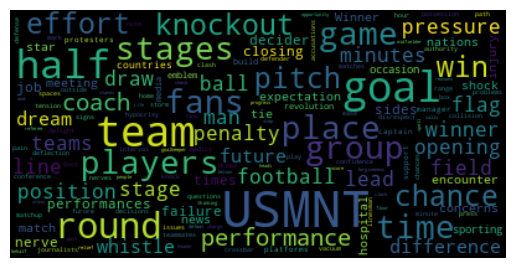

In [47]:
# insérez votre code ici

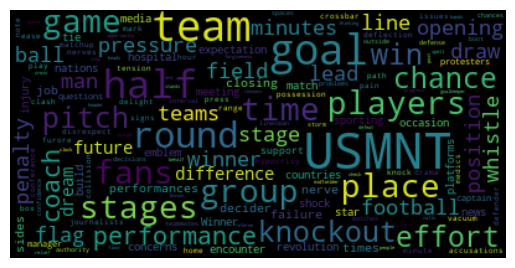

In [48]:
# insérez votre code ici